CIFAR

cuda
DP on


/home/anna/miniconda3/envs/ap/lib/python3.10/site-packages/opacus/privacy_engine.py:141: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/home/anna/miniconda3/envs/ap/lib/python3.10/site-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(


1,256,1,PGD,batch,{'eps': 0.3},True,1,mnist,256,1.5
Experiment 1: Training started


  0%|                                                                                                           | 0/234 [00:00<?, ?it/s]/home/anna/miniconda3/envs/ap/lib/python3.10/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
354it [01:02,  5.69it/s]                                                                                                                


Experiment 1: Epoch   1/1, train loss: 1.57e+00, train acc: 0.481


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:02<00:00, 107.06it/s]


Test accuracy: 0.920703125
Training time:  01:02
Adversarial robustness test started


100%|████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:35<00:00, 105.05it/s]


Epsilon: 0	Test Accuracy = 9203 / 10000 = 0.9203


100%|████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:31<00:00, 109.51it/s]


Epsilon: 0.00784313725490196	Test Accuracy = 9098 / 10000 = 0.9098


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:40<00:00, 99.09it/s]

Epsilon: 0.03137254901960784	Test Accuracy = 8736 / 10000 = 0.8736


<Figure size 640x480 with 0 Axes>

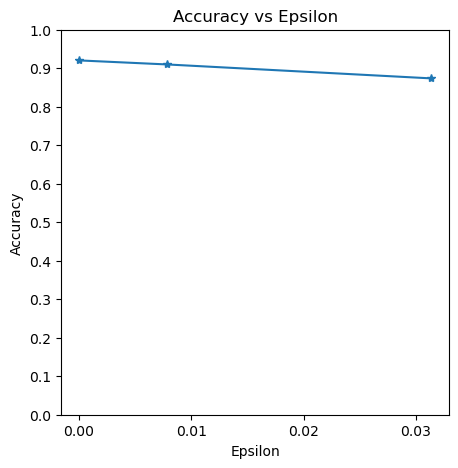

TypeError: 'generator' object is not subscriptable

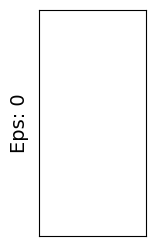

In [1]:
import torch
import torchattacks
import random

import numpy as np

from experiment import Experiment

seed = 34

torch.backends.cudnn.deterministic = True
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

batch_sizes=[256]
adv_attack_modes =['batch']
dp_mode=[True] 
epsilons = [1]
epochs_range = [1]
max_grad_norms = [1.5]
advs = [ 
#     {
#         'attack': torchattacks.FFGSM, 
#         'params': {'eps':8/255}
#     }, 
#     {
#         'attack': None, 
#         'params': None
#     },
    {
        'attack': torchattacks.PGD, 
        'params': {'eps':0.3}
    }, 
#     {
#         'attack': torchattacks.PGDL2, 
#         'params': {'eps':8/255}
#     }, 
    ]

id = 1

for batch_size in batch_sizes:
    for dp in dp_mode:
        for adv_attack_mode in adv_attack_modes:
            for epsilon in epsilons:
                for epochs in epochs_range:
                    for max_grad_norm in max_grad_norms:
                        for adv in advs:
                            Experiment(
                                batch_size, 
                                epochs, 
                                adv["attack"], 
                                adv_attack_mode, 
                                adv["params"], 
                                device, 
                                id,
                                save=False, 
                                dp=dp, 
                                target_epsilon=epsilon, 
                                dataset='mnist', 
                                max_grad_norm=max_grad_norm).run()
                            id += 1
